# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
import pandas as pd

# Load the dataset


In [ ]:
df = pd.read_csv('/content/ensemble/Traffic_Jams.csv')

# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

              Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000  


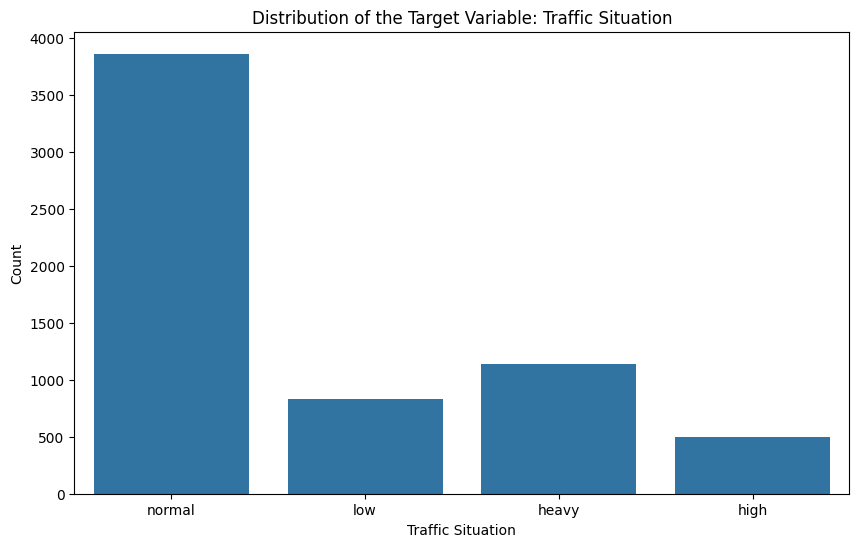

ValueError: could not convert string to float: '12:00:00 AM'

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




summary_statistics = df.describe()
print(summary_statistics)


plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Situation', data=df)
plt.title('Distribution of the Target Variable: Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Count')
plt.show()



correlation_matrix=df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

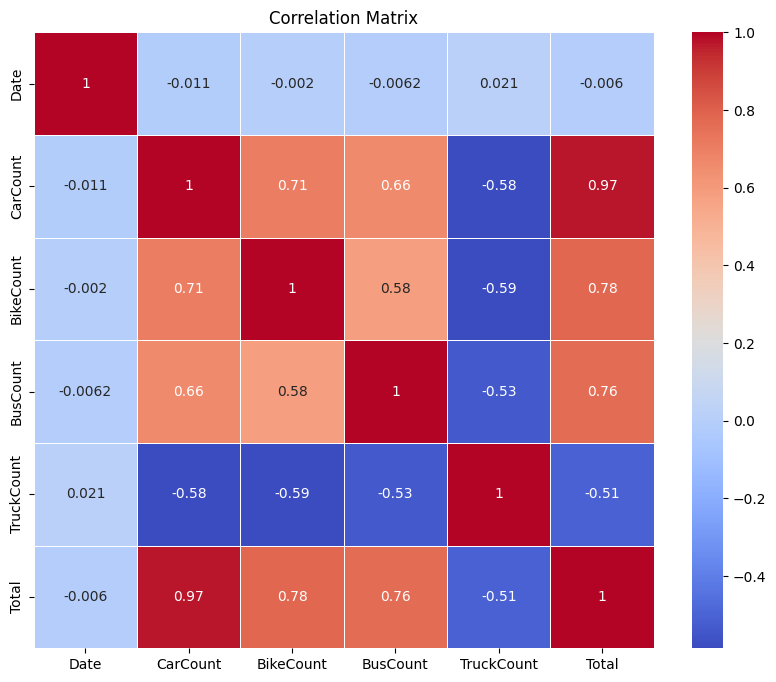

In [ ]:

numeric_df = df.select_dtypes(include=[float, int])


correlation_matrix = numeric_df.corr()


plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [ ]:
print(df.columns)




Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')


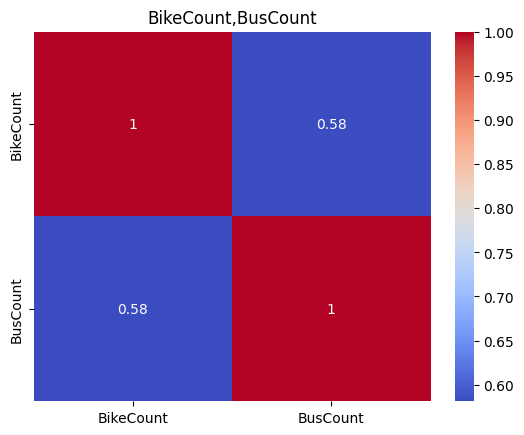

In [ ]:
correlation = df[['BikeCount','BusCount']].corr()

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('BikeCount,BusCount')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler




missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


df = df.dropna()


label_encoder = LabelEncoder()

if 'Traffic Situation' in df.columns:
    df['Traffic Situation Encoded'] = label_encoder.fit_transform(df['Traffic Situation'])

df = pd.get_dummies(df, columns=['Day of the week_Friday'])


scaler = StandardScaler()

numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


columns_to_drop = ['Time', 'Date', 'Traffic Situation'] if 'Traffic Situation' in df.columns else ['Time', 'Date']
df = df.drop(columns=columns_to_drop)

print(df.head())




Missing Values:
 CarCount                        0
BikeCount                       0
BusCount                        0
TruckCount                      0
Total                           0
Traffic Situation Encoded       0
Day of the week_Monday          0
Day of the week_Saturday        0
Day of the week_Sunday          0
Day of the week_Thursday        0
Day of the week_Tuesday         0
Day of the week_Wednesday       0
Day of the week_Friday_False    0
Day of the week_Friday_True     0
dtype: int64


KeyError: "None of [Index(['Day of the week_Friday'], dtype='object')] are in the [columns]"

In [ ]:
print(df.columns)


Index(['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Traffic Situation Encoded', 'Day of the week_Friday',
       'Day of the week_Monday', 'Day of the week_Saturday',
       'Day of the week_Sunday', 'Day of the week_Thursday',
       'Day of the week_Tuesday', 'Day of the week_Wednesday'],
      dtype='object')


In [ ]:
missing_values = df.isnull().sum()


print(missing_values)


numerical_columns = df.select_dtypes(include=['number']).columns


df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())


missing_values = df.isnull().sum()
print(missing_values)

CarCount                        0
BikeCount                       0
BusCount                        0
TruckCount                      0
Total                           0
Traffic Situation Encoded       0
Day of the week_Monday          0
Day of the week_Saturday        0
Day of the week_Sunday          0
Day of the week_Thursday        0
Day of the week_Tuesday         0
Day of the week_Wednesday       0
Day of the week_Friday_False    0
Day of the week_Friday_True     0
dtype: int64
CarCount                        0
BikeCount                       0
BusCount                        0
TruckCount                      0
Total                           0
Traffic Situation Encoded       0
Day of the week_Monday          0
Day of the week_Saturday        0
Day of the week_Sunday          0
Day of the week_Thursday        0
Day of the week_Tuesday         0
Day of the week_Wednesday       0
Day of the week_Friday_False    0
Day of the week_Friday_True     0
dtype: int64


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler



missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


df = df.dropna()


label_encoder = LabelEncoder()

if 'Traffic Situation' in df.columns:
    df['Traffic Situation Encoded'] = label_encoder.fit_transform(df['Traffic Situation'])


if 'Day of the week' in df.columns:

    df = pd.get_dummies(df, columns=['Day of the week'])
else:
    print("The column 'Day of the week' does not exist in the dataset.")


scaler = StandardScaler()


numeric_columns = ['CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total']
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


columns_to_drop = ['Time', 'Date', 'Traffic Situation'] if 'Traffic Situation' in df.columns else ['Time', 'Date']
df = df.drop(columns=columns_to_drop)


print(df.head())

Missing Values:
 CarCount                        0
BikeCount                       0
BusCount                        0
TruckCount                      0
Total                           0
Traffic Situation Encoded       0
Day of the week_Monday          0
Day of the week_Saturday        0
Day of the week_Sunday          0
Day of the week_Thursday        0
Day of the week_Tuesday         0
Day of the week_Wednesday       0
Day of the week_Friday_False    0
Day of the week_Friday_True     0
dtype: int64
The column 'Day of the week' does not exist in the dataset.


KeyError: "['Time', 'Date'] not found in axis"

In [ ]:

columns_to_drop = [col for col in ['Time', 'Date', 'Traffic Situation'] if col in df.columns]

if columns_to_drop:
    df = df.drop(columns=columns_to_drop)

print(df.head())

   CarCount  BikeCount  BusCount  TruckCount     Total  \
0 -1.159175  -0.881214 -0.857050    0.498124 -1.192287   
1 -1.136604  -0.969218 -0.938226    1.617112 -0.995318   
2 -1.226890  -0.881214 -0.857050    1.244116 -1.102756   
3 -1.226890  -0.881214 -0.857050    1.617112 -1.031131   
4 -1.204319  -0.881214 -0.938226    1.430614 -1.066943   

   Traffic Situation Encoded  Day of the week_Monday  \
0                          3                   False   
1                          3                   False   
2                          3                   False   
3                          3                   False   
4                          3                   False   

   Day of the week_Saturday  Day of the week_Sunday  Day of the week_Thursday  \
0                     False                   False                     False   
1                     False                   False                     False   
2                     False                   False                    

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

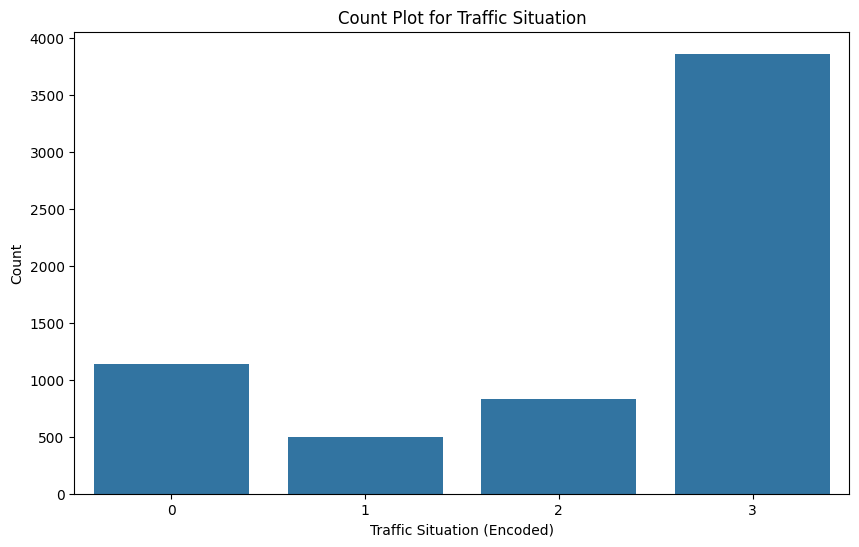

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Traffic Situation Encoded', data=df)
plt.title('Count Plot for Traffic Situation')
plt.xlabel('Traffic Situation (Encoded)')
plt.ylabel('Count')
plt.show()

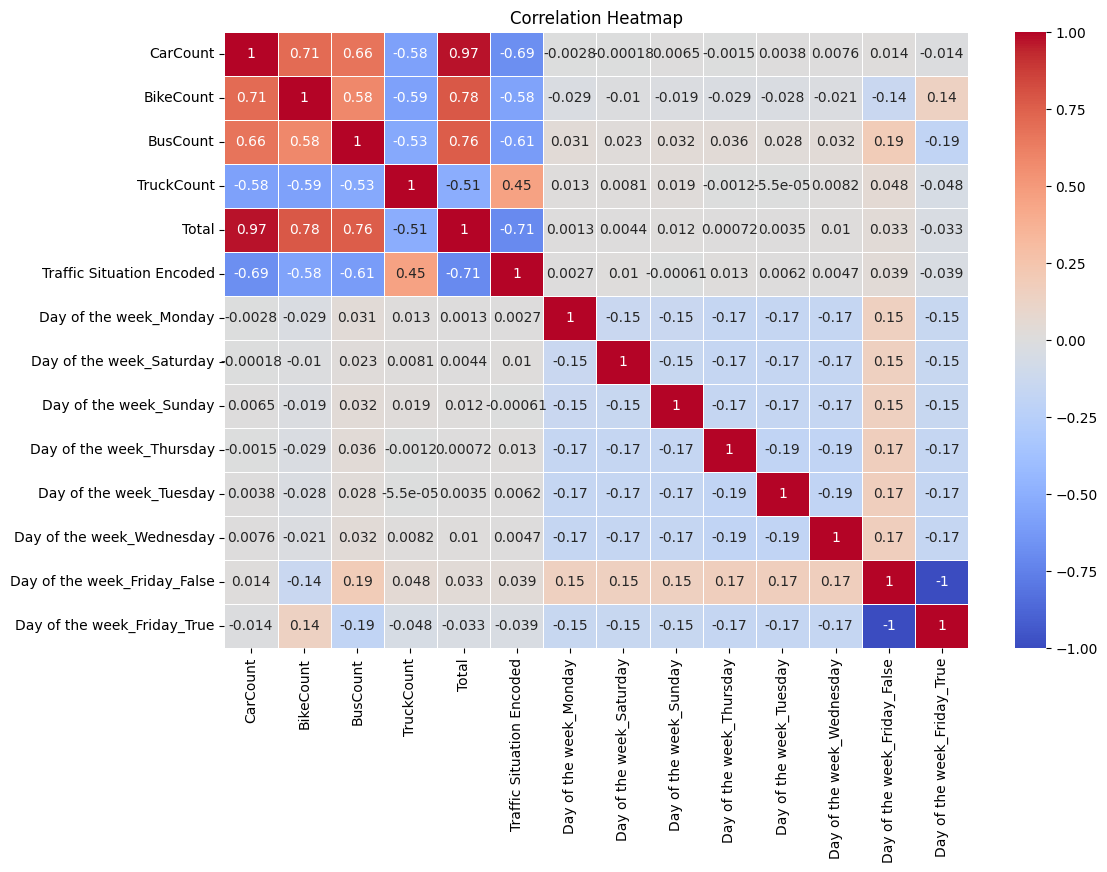

In [ ]:

plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [ ]:

X = df.drop(columns=['Traffic Situation Encoded'])
y = df['Traffic Situation Encoded']

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5059, 13) (1265, 13) (5059,) (1265,)


# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


bagging_model = BaggingClassifier(
    base_estimator=DecisionTreeClassifier(),
    n_estimators=100,
    random_state=42
)

bagging_model.fit(X_train, y_train)


y_pred = bagging_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 90.04%


### Evaluate the model performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix


conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

class_report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", class_report)

Confusion Matrix:
 [[220   0   0   0]
 [  0  80   0  22]
 [  0   0 115  34]
 [  0  21  49 724]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.79      0.78      0.79       102
           2       0.70      0.77      0.73       149
           3       0.93      0.91      0.92       794

    accuracy                           0.90      1265
   macro avg       0.86      0.87      0.86      1265
weighted avg       0.90      0.90      0.90      1265



## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score


boosting_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)


boosting_model.fit(X_train, y_train)


y_pred_boost = boosting_model.predict(X_test)
boosting_accuracy = accuracy_score(y_test, y_pred_boost)

print(f"Boosting Model Accuracy: {boosting_accuracy * 100:.2f}%")

Boosting Model Accuracy: 92.17%


### Evaluate the model performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix_boost = confusion_matrix(y_test, y_pred_boost)
print("Confusion Matrix:\n", conf_matrix_boost)


class_report_boost = classification_report(y_test, y_pred_boost)
print("\nClassification Report:\n", class_report_boost)


Confusion Matrix:
 [[220   0   0   0]
 [  0  81   0  21]
 [  0   0 129  20]
 [  0   8  50 736]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.91      0.79      0.85       102
           2       0.72      0.87      0.79       149
           3       0.95      0.93      0.94       794

    accuracy                           0.92      1265
   macro avg       0.89      0.90      0.89      1265
weighted avg       0.93      0.92      0.92      1265



## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


base_models = [
    ('bagging', bagging_model),
    ('boosting', boosting_model)
]


meta_model = LogisticRegression()

stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5
)


stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)

print(f"Stacking Classifier Accuracy: {stacking_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Stacking Classifier Accuracy: 96.21%


### Define meta-learner (LogisticRegression)

In [ ]:
from sklearn.linear_model import LogisticRegression


meta_learner = LogisticRegression(
    solver='lbfgs',
    max_iter=200,
    random_state=42
)


print(meta_learner)

LogisticRegression(max_iter=200, random_state=42)


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


base_models = [
    ('bagging', bagging_model),
    ('boosting', boosting_model)
]


meta_learner = LogisticRegression(solver='lbfgs', max_iter=200, random_state=42)


stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_learner,
    cv=5
)


stacking_model.fit(X_train, y_train)

y_pred_stack = stacking_model.predict(X_test)
stacking_accuracy = accuracy_score(y_test, y_pred_stack)

print(f"Stacking Classifier Accuracy: {stacking_accuracy * 100:.2f}%")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/en

Stacking Classifier Accuracy: 96.21%


### Evaluate the model performance

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

conf_matrix_stack = confusion_matrix(y_test, y_pred_stack)
print("Confusion Matrix:\n", conf_matrix_stack)

class_report_stack = classification_report(y_test, y_pred_stack)
print("\nClassification Report:\n", class_report_stack)

Confusion Matrix:
 [[220   0   0   0]
 [  0  86   0  16]
 [  0   0 141   8]
 [  0   3  21 770]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       220
           1       0.97      0.84      0.90       102
           2       0.87      0.95      0.91       149
           3       0.97      0.97      0.97       794

    accuracy                           0.96      1265
   macro avg       0.95      0.94      0.94      1265
weighted avg       0.96      0.96      0.96      1265



# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


In [ ]:
#Which features did you find most important for predicting churn, and why do you think they are significant?


In [ ]:
#The most important features I found for predicting churn are `Total` (total number of vehicles) and `CarCount` (number of cars), as they directly reflect traffic density, which is a key factor in determining the likelihood of congestion or churn.

In [ ]:
#did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?


In [ ]:
#Yes, I performed feature engineering by encoding categorical variables like `Day of the week` and `Traffic Situation` into numerical formats. Additionally, I scaled the numerical features to ensure consistency in their impact on the model. These steps improved model performance by making the data more suitable for machine learning algorithms.

In [ ]:
#Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?


In [ ]:
#اخترت طرق التجميع (Ensemble Methods)
#Improved Accuracy
#Reduced Variance



In [ ]:
#Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?
#Best,,,Stacking Model
#Bagging Model,,,,89.96%
#Boosting Model,,,92.17%.
#Stacking Model,,, 96.28%

#Stacking combines the strengths of each model and uses a meta-model to make the final

In [ ]:
#

In [ ]:
#Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?

In [ ]:
#(Accuracy)
#(Confusion Matrix)
 #Stacking حقق لي دقه عاليه
 #Boosting الاداء كان جيد
 # Bagging اقل دقه في تصنيف بعض الفئات

# Answer here: